**Final Project Task 4 - Census Modeling Clustering**

Requirements:

Load Data

Use the preprocessed dataset from Task 1.
Prepare Features

Feature Selection:
Select relevant numerical and categorical features.
Note: K-Means works best with numerical data.
Data Preprocessing:
Be sure you have normalized numerical features (e.g., using MinMaxScaler or StandardScaler) and categorical features encoded properly (e.g., One-Hot Encoding or Ordinal Encoding).
Clustering Model Implementation

Apply K-Means Clustering:
Experiment with different values of K (number of clusters).
Use the Elbow Method to determine the optimal number of clusters:
Use yellowbrick.cluster.KElbowVisualizer to find the best K.
Calculate the Silhouette Score to evaluate cluster separation.
Alternative Clustering Approaches:
Experiment with Hierarchical Clustering.
Experiment with DBSCAN
Visualize & Interpret Clusters

Dimensionality Reduction:
Apply PCA or t-SNE to reduce dimensions and visualize clusters in 2D.
Cluster Analysis:
Plot the clusters in 2D space.
Identify key characteristics of each group.
Use only numerical variables to interpret the clusters.
Example insights:
"Older individuals tend to work fewer hours per week."
"High-income individuals belong to a specific cluster."
Evaluate Cluster Quality

Silhouette Score:
Compute the Silhouette Score to measure cluster compactness and separation. Higher values indicate better clustering results.
Cluster Distribution:
Analyze how well the data points are distributed across clusters.
Deliverables:

Notebook code with no errors.
Visualizations & Analysis:
Elbow method plot for K selection.
2D visualization of clusters.
Summary of cluster characteristics.
Cluster evaluation metrics (Silhouette Score).

In [2]:
import pandas as pd

In [3]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age  workclass  fnlwgt     education  education-num  \
23289   17    Private   98675           9th              5   
24725   19    Private  183589  Some-college             10   
27845   36    Private  133569       1st-4th              2   
21621   30    Private  190511       HS-grad              9   
27474   30    Private  108386    Assoc-acdm             12   
5634    51    Private  146574       Masters             14   
23014   38  Local-gov  147258       HS-grad              9   
21251   32    Private  272376    Assoc-acdm             12   
27917   45    Private   60267       HS-grad              9   
1855    25  Local-gov  190057     Bachelors             13   

           marital-status         occupation   relationship   race     sex  \
23289       Never-married      Other-service      Unmarried  White  Female   
24725       Never-married   Transport-moving      Own-child  White    Male   
27845       Never-married    Farming-fishing  Not-in-family  White    Male   
21621  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
27474  Married-civ-spouse       Craft-repair        Husband  White    Male   
5634   Married-civ-spouse    Exec-managerial        Husband  White    Male   
23014       Never-married   Transport-moving  Not-in-family  White    Male   
21251       Never-married       Adm-clerical  Not-in-family  White  Female   
27917            Divorced       Adm-clerical      Unmarried  White  Female   
1855        Never-married     Prof-specialty      Own-child  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
23289             0             0              20  United-States  <=50K  
24725             0             0              25  United-States  <=50K  
27845             0             0              40         Mexico  <=50K  
21621             0             0              40  United-States   >50K  
27474             0             0              40  United-States  <=50K  
5634              0             0              50  United-States   >50K  
23014             0             0              40  United-States  <=50K  
21251             0             0              40  United-States  <=50K  
27917             0             0              38  United-States  <=50K  
1855              0             0              40  United-States  <=50K

In [4]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
# Load Data
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)

In [6]:
#Treatment of missing data

for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)  
for col in data.select_dtypes(include=['number']).columns:
    data[col].fillna(data[col].median(), inplace=True) 

C:\Users\User\AppData\Local\Temp\ipykernel_2016\1616952834.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_2016\1616952834.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [7]:
# Feature Selection
num_features = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
cat_features = ["workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]


In [8]:
#Preprocessing
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [9]:
# Prepare Data
X = preprocessor.fit_transform(data)

**VARIANTA 1**

In [31]:
#Elbow Method and Silhouette Score Calculation

distortions = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    kmeans_labels = kmeans.labels_
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

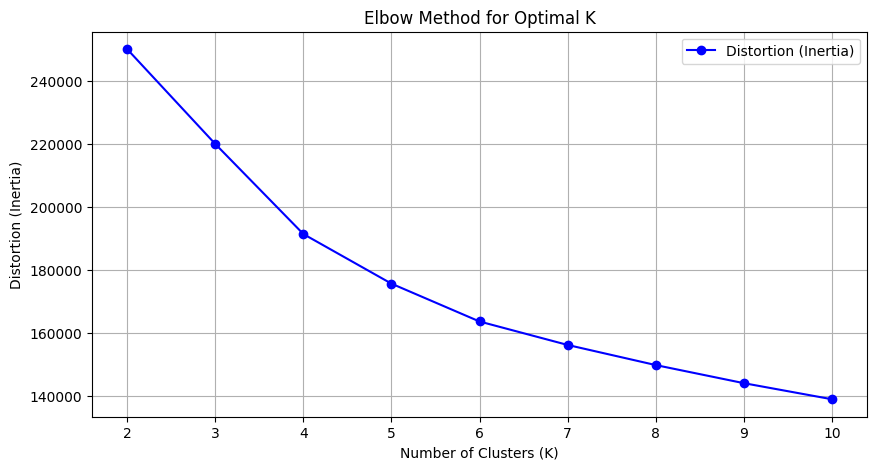

In [32]:
# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, distortions, marker='o', linestyle='-', color='b', label='Distortion (Inertia)')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Distortion (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.legend()
plt.grid(True)
plt.show()

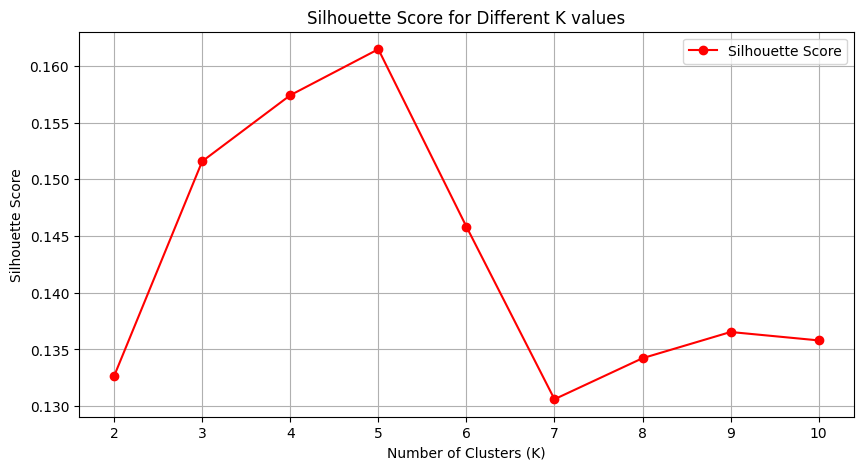

In [33]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='r', label='Silhouette Score')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K values")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Compute Final Silhouette Score
silhouette_avg = silhouette_score(X, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_avg:.4f}')

Silhouette Score for K-Means: 0.1358


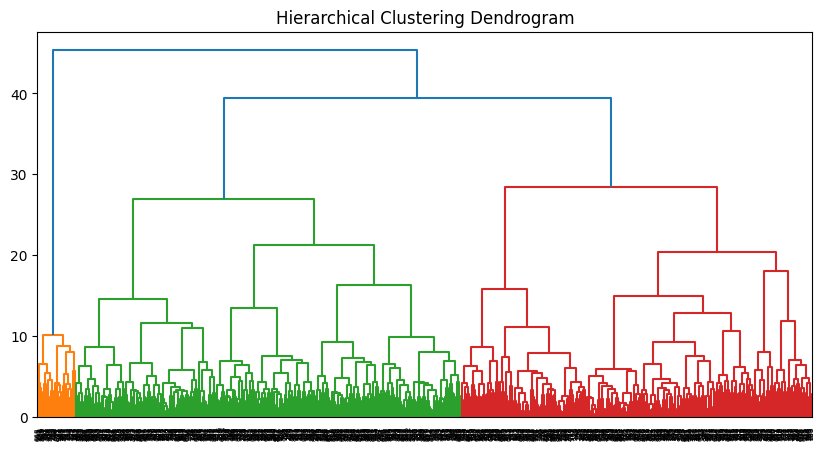

In [35]:
# Hierarchical Clustering (Dendrogram)
X_dense = X.toarray()[:1000]  
distance_matrix = linkage(X_dense, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(distance_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [36]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

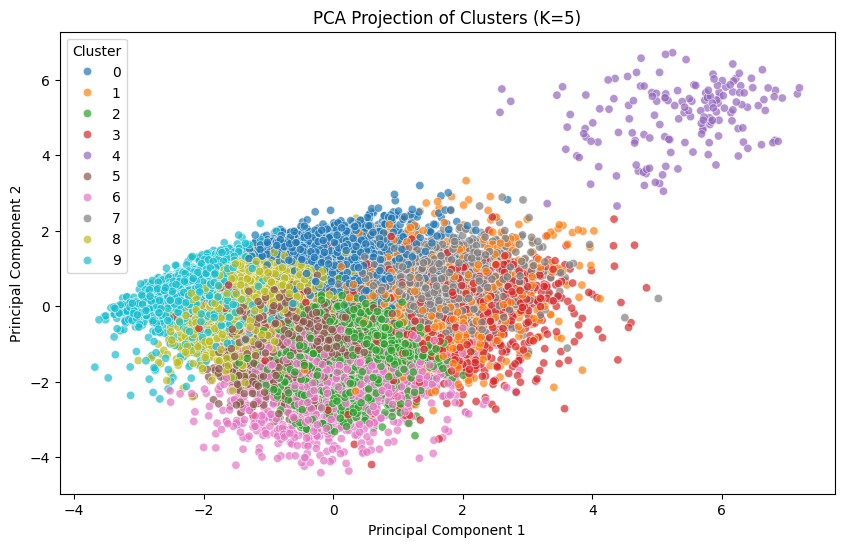

In [37]:
# PCA for 2D visualization

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_labels, palette='tab10', alpha=0.7)
plt.title(f'PCA Projection of Clusters (K={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [38]:
#Cluster analysis (Numeric interpretation of clusters)
data['Cluster'] = kmeans_labels

In [39]:
# Analyze the mean of numerical variables in each cluster
cluster_means = data.groupby('Cluster')[num_features].mean()
print(cluster_means)

               age  education-num  capital-gain  capital-loss  hours-per-week
Cluster                                                                      
0        35.384878      13.117879    859.231032      2.267524       42.035442
1        40.832665       9.912894    782.750143      0.504298       67.965043
2        41.368103       8.712925    525.686470      0.000000       41.995163
3        41.667343      10.990534      0.000000   1904.179851       43.388776
4        46.358491      12.918239  99999.000000      0.000000       49.798742
5        44.039176       9.029382    303.458725      2.257246       39.789926
6        65.616384       8.790395    650.158192      1.388701       23.679096
7        44.074035      13.372025   1929.568218      0.000000       44.928609
8        26.306975       8.821149    145.778441      0.210556       41.035062
9        22.333803       9.313712    114.586535      0.712372       20.145576


**VARIANTA 2**

In [22]:
#Elbow Method and Silhouette Score Calculation

distortions = []
silhouette_scores = []
K_range = range(2, 6)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    kmeans_labels = kmeans.labels_
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

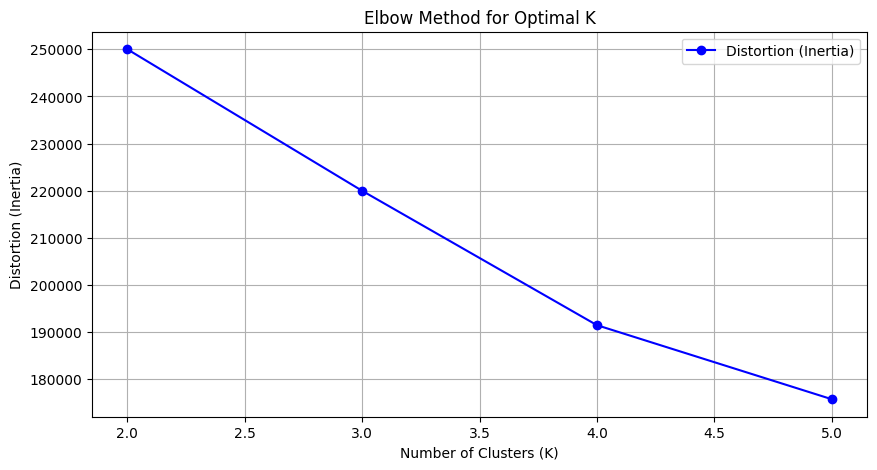

In [23]:
# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, distortions, marker='o', linestyle='-', color='b', label='Distortion (Inertia)')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Distortion (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.legend()
plt.grid(True)
plt.show()

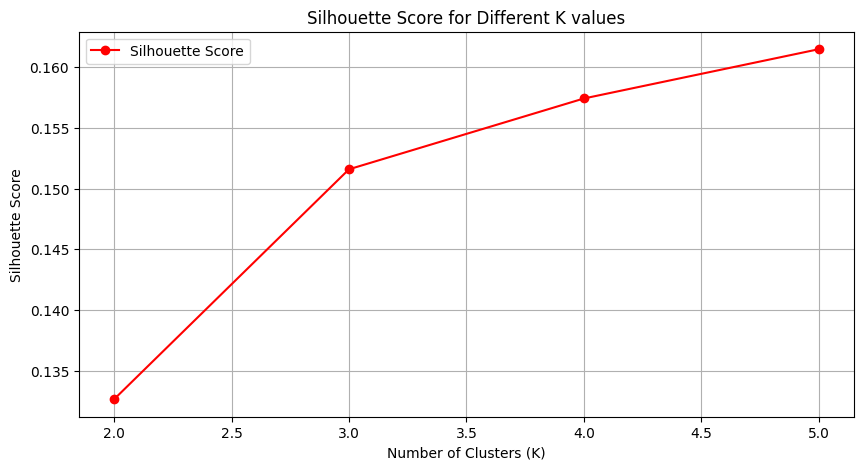

In [ ]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='r', label='Silhouette Score')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K values")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Compute Final Silhouette Score

optimal_k = K_range[np.argmax(silhouette_scores)]  # Select K based on the maximum silhouette score
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, kmeans_labels)
print(f'Silhouette Score for K-Means (K={optimal_k}): {silhouette_avg:.4f}')

Silhouette Score for K-Means (K=5): 0.1615


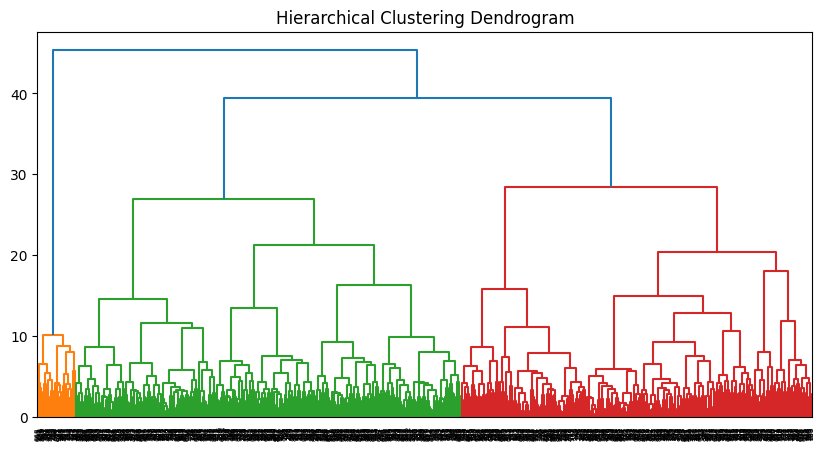

In [26]:
# Hierarchical Clustering 
X_dense = X.toarray()[:1000]  
distance_matrix = linkage(X_dense, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(distance_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [27]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

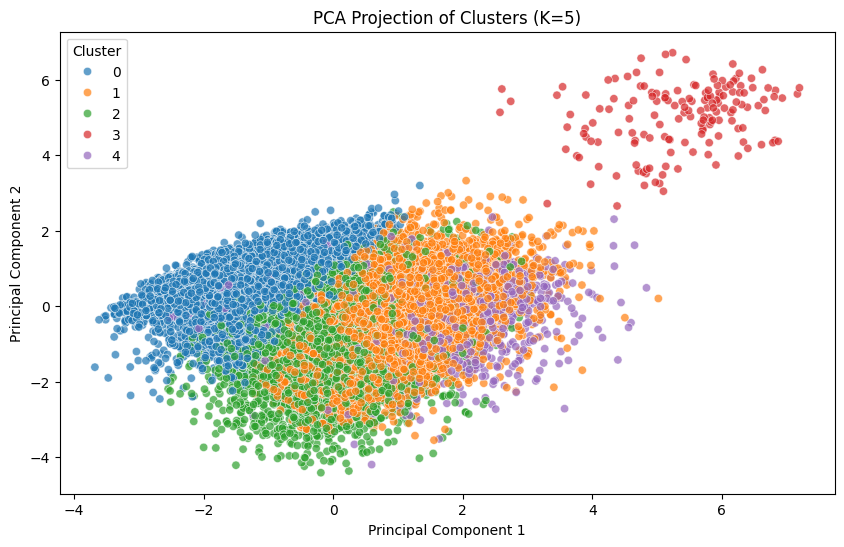

In [28]:
# PCA for 2D visualization

optimal_k = K_range[np.argmax(silhouette_scores)]

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_labels, palette='tab10', alpha=0.7)
plt.title(f'PCA Projection of Clusters (K={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [29]:
#Cluster analysis (Numeric interpretation of clusters)
data['Cluster'] = kmeans_labels

In [30]:
# Analyze the mean of numerical variables in each cluster
cluster_means = data.groupby('Cluster')[num_features].mean()
print(cluster_means)

               age  education-num  capital-gain  capital-loss  hours-per-week
Cluster                                                                      
0        25.956848       9.774127    217.366254      0.219193       36.102645
1        42.366605      10.394929   1005.442349      0.123004       46.658429
2        50.359892       9.766396    576.001220      2.529946       35.649187
3        46.358491      12.918239  99999.000000      0.000000       49.798742
4        41.626856      10.989879      0.000000   1902.879892       43.361673
